In [ ]:
import os
import random
from torchvision import transforms
from PIL import Image
from torchvision.transforms.functional import to_pil_image
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def get_transformer_function(img_resize=100):
  return transforms.Compose([
    transforms.Resize((img_resize, img_resize)),
    transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
  
transform = get_transformer_function(100)

In [ ]:
def process_and_save_image(image_path, output_path, transform):
    image = Image.open(image_path).convert("RGB")
    transformed_image = transform(image)
    pil_image = to_pil_image(transformed_image)
    pil_image.save(output_path)

    return pil_image

In [ ]:
def process_images(src_dir, dest_dir, transform):
    for root, dirs, files in os.walk(src_dir):
        for name in files:
            if name.lower().endswith(('.png', '.jpg', '.jpeg')):
                src_path = os.path.join(root, name)
                rel_path = os.path.relpath(root, src_dir)
                dest_folder = os.path.join(dest_dir, rel_path)
                dest_path = os.path.join(dest_folder, name)
                
                if not os.path.exists(dest_folder):
                    os.makedirs(dest_folder)
                
                process_and_save_image(src_path, dest_path, transform)
                print(f"Saved image: {name} to path: {dest_path}")

In [ ]:
source_folder = "/content/drive/MyDrive/ULTRADATA/Motos"

destination_folder = "/content/drive/MyDrive/ULTRADATA/Motos100x100preproc"

for root, dirs, files in os.walk(source_folder):
    for name in files:
        if name.lower().endswith(('.png', '.jpg', '.jpeg')):
            src_path = os.path.join(root, name)
            rel_path = os.path.relpath(root, source_folder)
            dest_folder = os.path.join(destination_folder, rel_path)
            dest_path = os.path.join(dest_folder, name)

process_images(source_folder, destination_folder, transform)

Saved image: 2020 6D MX San Agustín - 8934.jpg to path: /content/drive/MyDrive/ULTRADATA/Motos100x100preproc/Train/28/2020 6D MX San Agustín - 8934.jpg
Saved image: 2020 6D MX San Agustín - 9156.jpg to path: /content/drive/MyDrive/ULTRADATA/Motos100x100preproc/Train/28/2020 6D MX San Agustín - 9156.jpg
Saved image: 2020 6D MX San Agustín - 8987.jpg to path: /content/drive/MyDrive/ULTRADATA/Motos100x100preproc/Train/28/2020 6D MX San Agustín - 8987.jpg
Saved image: 2020 6D MX San Agustín - 8986.jpg to path: /content/drive/MyDrive/ULTRADATA/Motos100x100preproc/Train/28/2020 6D MX San Agustín - 8986.jpg
Saved image: 2020 6D MX San Agustín - 9155.jpg to path: /content/drive/MyDrive/ULTRADATA/Motos100x100preproc/Train/28/2020 6D MX San Agustín - 9155.jpg
Saved image: 2020 550D MX San Agustín - 8631.jpg to path: /content/drive/MyDrive/ULTRADATA/Motos100x100preproc/Train/27/2020 550D MX San Agustín - 8631.jpg
Saved image: 2020 6D MX San Agustín - 8998.jpg to path: /content/drive/

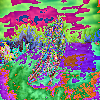

In [ ]:
process_and_save_image(src_path, dest_path, transform)

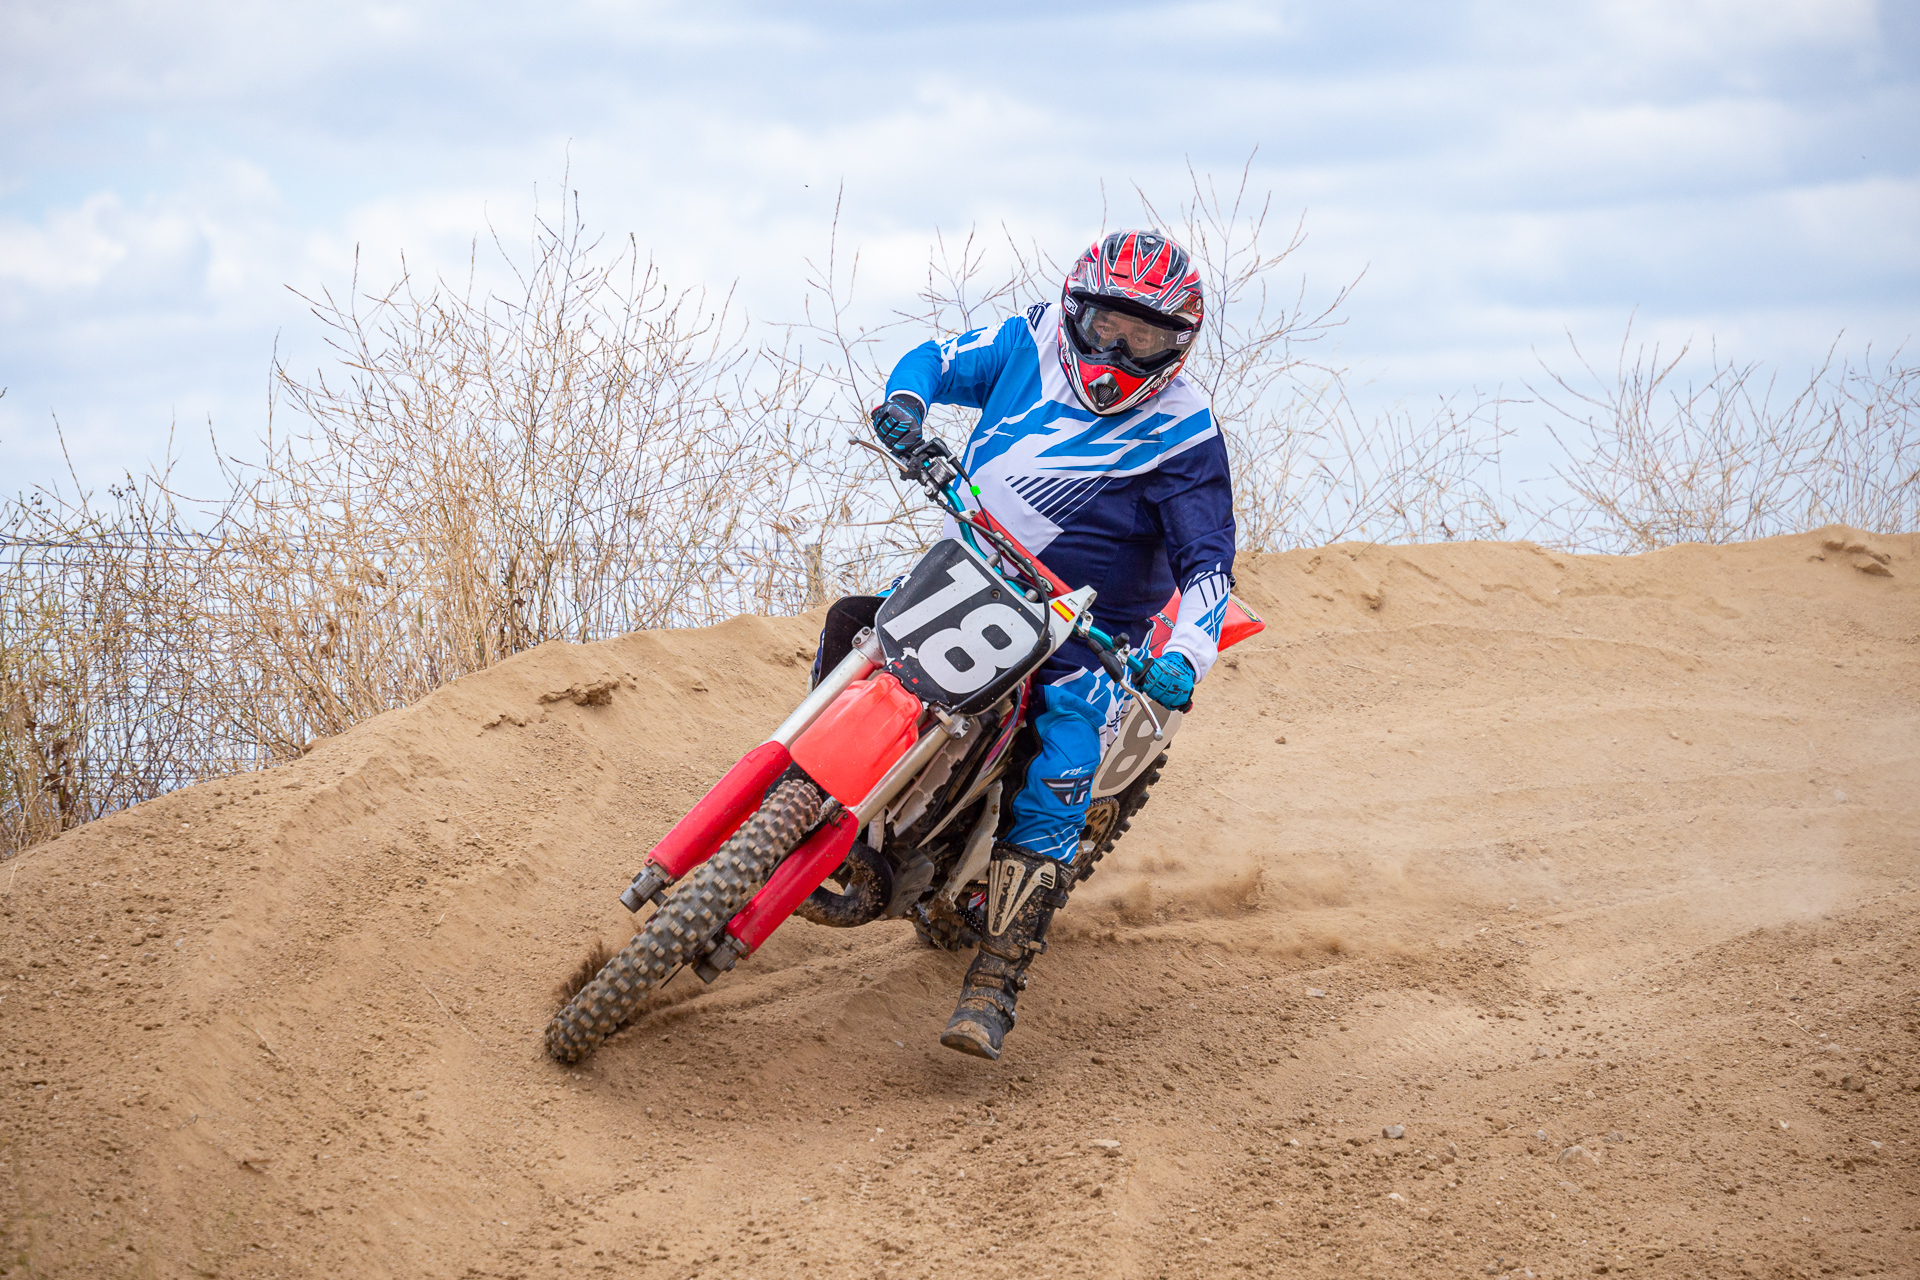

In [ ]:
Image.open(src_path)

## Creating the test folder from the train folder

In [ ]:
import os
import shutil

In [ ]:
os.listdir("/content/drive/MyDrive/ULTRADATA/Motos")

['.BridgeSort', 'Train', '.ipynb_checkpoints', 'Test']

In [ ]:
os.mkdir("/content/drive/MyDrive/ULTRADATA/Motos_reencuadradas/Train")
os.mkdir("/content/drive/MyDrive/ULTRADATA/Motos_reencuadradas/Test")

In [ ]:
os.listdir("/content/drive/MyDrive/ULTRADATA/Motos_reencuadradas/")

['14',
 '1',
 '16',
 '17',
 '11',
 '13',
 '18',
 '10',
 '15',
 '12',
 '24',
 '26',
 '23',
 '27',
 '22',
 '25',
 '2',
 '19',
 '28',
 '20',
 '3',
 '4',
 '6',
 '8',
 '7',
 '9',
 '5',
 'Train',
 'Test']

In [ ]:
for folder in os.listdir("/content/drive/MyDrive/ULTRADATA/Motos_reencuadradas/"):
  if folder != "Train" and folder != "Test":
    shutil.move(f"/content/drive/MyDrive/ULTRADATA/Motos_reencuadradas/{folder}", f"/content/drive/MyDrive/ULTRADATA/Motos_reencuadradas/Train/{folder}")

In [ ]:
for folder in os.listdir("/content/drive/MyDrive/ULTRADATA/Motos_reencuadradas/Train"):
  if folder != "Train" and folder != "Test":
    os.mkdir(f"/content/drive/MyDrive/ULTRADATA/Motos_reencuadradas/Test/{folder}")